In [1]:
import mdtraj as md

In [2]:
pdb = md.load_pdb('./Data/1UBQ_h.pdb')
print(pdb)

<mdtraj.Trajectory with 1 frames, 1231 atoms, 76 residues, and unitcells>


In [3]:
hbonds = md.baker_hubbard(pdb, periodic=False)
label2 = lambda hbond : '%s -- %s' % (pdb.topology.atom(hbond[0]), pdb.topology.atom(hbond[2]))
i = 0
for hbond in hbonds:
    i+=1
    print(label2(hbond))
print(i)

MET1-N -- VAL17-O
ILE3-N -- LEU15-O
PHE4-N -- SER65-O
VAL5-N -- ILE13-O
LYS6-N -- LEU67-O
THR7-N -- LYS11-O
THR9-N -- THR7-OG1
GLY10-N -- THR7-O
ILE13-N -- VAL5-O
LEU15-N -- ILE3-O
VAL17-N -- MET1-O
GLU18-N -- ASP21-OD2
ASP21-N -- GLU18-O
ILE23-N -- ARG54-O
GLU24-N -- ASP52-O
ASN25-N -- THR22-O
ASN25-N -- THR22-OG1
VAL26-N -- THR22-O
LYS27-N -- ILE23-O
LYS27-NZ -- ASP52-OD2
ALA28-N -- GLU24-O
LYS29-N -- ASN25-O
LYS29-NZ -- GLU16-O
ILE30-N -- VAL26-O
GLN31-N -- LYS27-O
ASP32-N -- ALA28-O
LYS33-N -- LYS29-O
GLU34-N -- ILE30-O
GLY35-N -- GLN31-O
GLN40-N -- PRO37-O
GLN41-N -- PRO38-O
GLN41-NE2 -- ILE36-O
GLN41-NE2 -- LYS27-O
ARG42-N -- VAL70-O
ARG42-NE -- GLN49-NE2
ILE44-N -- HIS68-O
PHE45-N -- LYS48-O
LYS48-N -- PHE45-O
LEU50-N -- LEU43-O
GLU51-N -- TYR59-OH
ARG54-N -- GLU51-O
THR55-N -- ASP58-OD1
LEU56-N -- ASP21-O
SER57-N -- PRO19-O
ASP58-N -- THR55-O
ASP58-N -- THR55-OG1
TYR59-N -- LEU56-O
ASN60-N -- SER57-O
ILE61-N -- LEU56-O
GLU64-N -- GLN2-O
SER65-N -- GLN62-O
LEU67-N -- PHE4-O
HIS6

In [4]:
secondary_s = md.compute_dssp(pdb,simplified=False)
print(secondary_s)
import collections
data_count=collections.Counter(secondary_s.flatten())
data_count

[[' ' 'E' 'E' 'E' 'E' 'E' 'E' 'T' 'T' 'S' ' ' 'E' 'E' 'E' 'E' 'E' ' ' ' '
  'T' 'T' 'S' 'B' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' ' ' ' '
  ' ' 'G' 'G' 'G' 'E' 'E' 'E' 'E' 'E' 'T' 'T' 'E' 'E' ' ' ' ' 'T' 'T' 'S'
  'B' 'T' 'G' 'G' 'G' 'T' ' ' ' ' 'T' 'T' ' ' 'E' 'E' 'E' 'E' 'E' 'E' ' '
  ' ' 'S' ' ' ' ']]


Counter({' ': 16, 'E': 24, 'T': 12, 'S': 4, 'B': 2, 'H': 12, 'G': 6})

In [5]:
# this notebook is for plotting
# the end to end analysis
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md

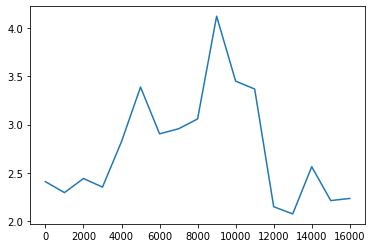

In [6]:
# top file is ../Data/1hz3_T310.start.nowater.gro
# trajectory file is ../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc
# load the trajectory
traj = md.load_xtc('./Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='./Data/1hz3_T310.start.nowater.gro')
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)

#plot distance vs time
plt.plot(traj.time, dist)


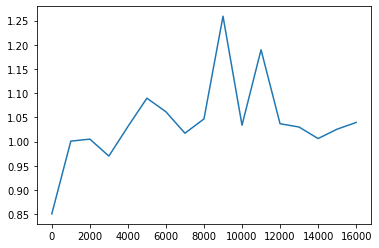

In [7]:
result = md.compute_rg(traj, masses=None)
plt.plot(traj.time, result)   

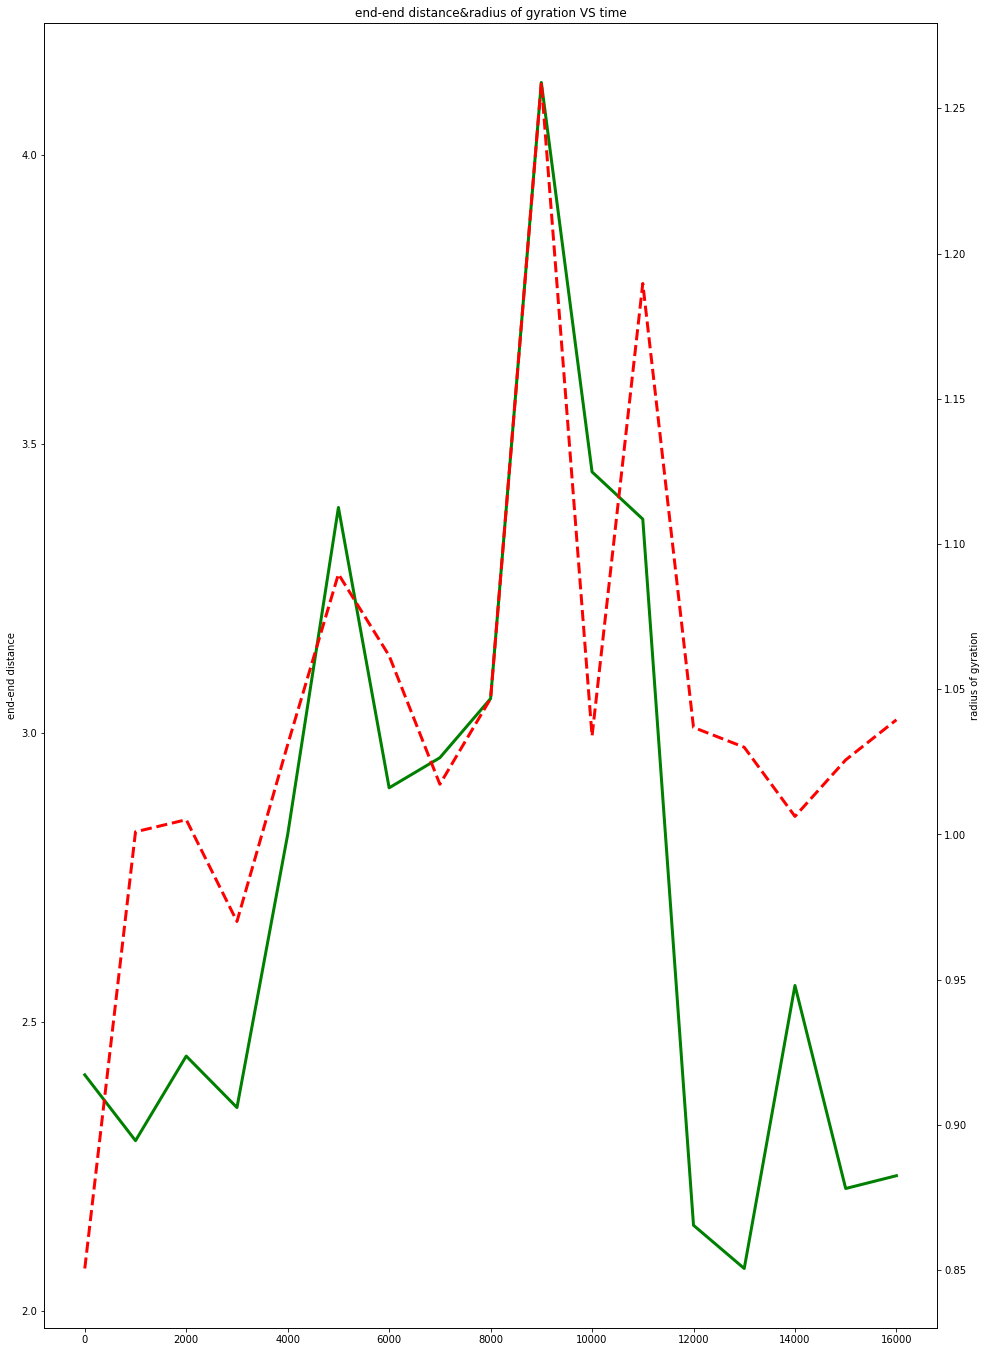

In [15]:
x_a = traj.time
y_a1 = dist
y_a2 = result
fig = plt.figure(num=3,figsize=(16,24),facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(x_a, y_a1,'g',linewidth=3,linestyle='solid')
ax1.set_ylabel('end-end distance')
ax1.set_title("end-end distance&radius of gyration VS time")
ax2 = ax1.twinx()  # this is the important function
ax2.plot(x_a, y_a2, 'r',linewidth=3,linestyle='dashed')#supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
#ax2.set_xlim([0, np.e])
ax2.set_ylabel('radius of gyration')
ax2.set_xlabel('t(ps)')
plt.show()

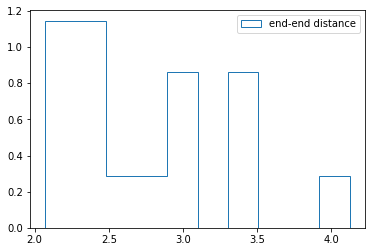

In [9]:
fig,ax1 = plt.subplots() # Instantiate figure and axes object
ax1.hist(dist, label="end-end distance", histtype="step", density=True) # Plot histogram of end-end distance
plt.legend()
plt.show()

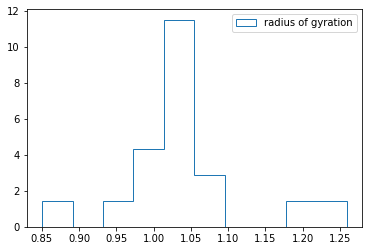

In [11]:
fig,ax2 =plt.subplots()
ax2.hist(result, label="radius of gyration", histtype="step", density=True) # Plot histogram of radius of gyration
plt.legend()
plt.show()